#Deep Reinforcement Learning
## Trabalho 2

### Group 6:
### Alunas: Alana de Santana Correia - RA: 229999, 
### Letícia Mara Berto - RA: 212069
### Giovanna Relvas Bartilotti - RA: 023907

### Professora: Esther Luna Colombini

O objetivo deste trabalho é aplicar métodos de controle de deep reinforcement learning em um problema modelado e especificado pelo grupo. Inicialmente, utilizamos algoritmos ***off-policy*** e ***on-policy*** em uma fase do jogo Ms. Pacman disponibilizado pela [openai](https://gym.openai.com/). Ao analisar os resultados obtidos observamos que para treinar com sucesso um agente nesse ambiente seria necessária quantidade de ***time_steps*** bastante elevada (da ordem de milhões). Infelizmente, o grupo não possui tantos recursos computacionais disponíveis de modo a conseguir treinar com sucesso um agente nesse ambiente e explorar trocas de parâmetros. Com isso, produzimos um baseline utilizando o Pacman e em seguida decidimos mudar para um ambiente menos complexo (CartPole), possibilitando a exploração de mais configurações de parâmetros. Este relatório contempla a descrição de cada ambiente, MDP e resultados dos experimentos.

# Deep Reinforcement Learning - Métodos
Para esse trabalho utilizamos as implementações disponiveis em [Stable Baselines](https://stable-baselines.readthedocs.io/en/master/) (conjunto de implementações aprimoradas de algoritmos de Reinforcement Learning baseados em OpenAI Baselines), conforme uma das indicações da professora Esther. Utilizamos como base da nossa implementação o notebook do artigo do [Medium](https://towardsdatascience.com/stable-baselines-a-fork-of-openai-baselines-reinforcement-learning-made-easy-df87c4b2fc82). Contudo, fizemos adaptações para nosso ambiente e incluimos novas implementações para auxiliar na ánalise dos resultados.

Como fase inicial do projeto, fizemos alguns testes rápidos com um conjunto de algoritmos off-policy (DQN, Double-DQN e SAC) e on-policy (PPO, A2C e TRPO) utilizando o ambiente Ms. Pacman com o objetivo de avaliar a viabilidade de utilização de pelo menos duas técnicas testadas. Analisando os resultados obtidos e considerando as vantagens e desvantagens encontradas nos testes preliminares, decidimos seguir o trabalho utilizando o DQN como off-policy e o PPO como on-policy. 

##  DQN (off-policy)

O algoritmo DQN (Deep Q-Network), desenvolvido em 2015, aprimorou um algoritmo RL clássico chamado Q-Learning, explorado no primeiro trabalho desta disciplina. Embora o Q-learning seja um algoritmo muito poderoso, sua principal fraqueza é a falta de generalidade. Ao visualizar o Q-learning como números de atualização em uma matriz bidimensional (Espaço de Ação * Espaço de Estado), ele se parecerá com a programação dinâmica. Isso indica que, para os estados que o agente de Q-learning não viu antes, não tem ideia de qual ação executar. Em outras palavras, o agente de Q-learning não tem a capacidade de estimar valor para estados invisíveis. Para lidar com esse problema, o DQN se livra da matriz bidimensional introduzindo a Rede Neural Artificial Profunda (Deep Learning).

O DQN utiliza uma rede neural para estimar a função de valor Q (Q-function). 
A entrada para a rede é a corrente, enquanto a saída é o valor *Q* correspondente à cada ação. É importante notar que é uma abordagem diferente do Q-Learning, já que usualmente tratamos as ações possíveis de um estado como uma entrada para a Q-function, isso deve ser levado em consideração, porque ao utilizarmos essa estratégia podemos encontrar a ação que maximiza a Q-function em um única passagem pela RNA, enquanto pela abordagem tradicional o número de passagens necessárias seria igual ao número de ações disponíveis para tal estado.

DQN é um dos muitos algoritmos que combina Aprendizado Profundo e Aprendizado por Reforço para aprender estratégias diretamente de dados brutos de alta dimensão. Ao combinar redes neurais com o Q-Learning, a DQN promoveu o desenvolvimento do Reinforcement Learning e expandiu seus cenários de aplicação. Entretanto, sua principal limitação é que ela funciona apenas com estados e espaços de ação discretos e finitos.  A ideia da abordagem somente do crítico é usar uma função de valor *Q* para aprender a política de seleção de ação ótima que maximiza a recompensa futura esperada dado o estado atual. Em vez de calcular uma tabela de valores de ação de estado, DQN minimizao erro quadrático médio entre os valores Q-alvo e usa uma rede neural para realizar a aproximação da função. 

## PPO (on-policy)

O PPO (Proximal Policy Optimization) foi introduzido pela equipe OpenAI em 2017 e rapidamente se tornou um dos métodos de RL mais populares, usurpando o método de aprendizado Deep-Q-Learning. O PPO  envolve a coleta de um pequeno batch de experiências interagindo com o ambiente, e o uso desse batch para atualizar sua política de tomada de decisão. Depois que a política é atualizada com este batch, as experiências são descartadas e um batch mais recente é coletado com a política recém-atualizada. Esta é a razão pela qual é uma abordagem de “on-policy learning”, em que as amostras de experiência coletadas são úteis apenas para atualizar a política atual uma vez. A principal contribuição do PPO é garantir que uma nova atualização da política não a altere muito em relação à política anterior. Isso leva a uma menor variação no treinamento ao custo de algum viés, mas garante um treinamento mais suave e também garante que o agente não siga um caminho irrecuperável de tomar ações sem sentido. Ele é introduzido para controlar a atualização do gradiente da política e garantir que a nova política não seja muito diferente da anterior.

O PPO tenta simplificar o objetivo da otimização de política de região confiável (TRPO), introduzindo um termo de "clip" para a função objetivo, desencorajando grandes mudanças de política fora do intervalo. Portanto, o PPO melhora a estabilidade do treinamento das redes de política ao restringir a atualização da política em cada etapa do treinamento. Nós usamos a abordagem actor-critic em nosso agente PPO. O *actor* realiza a tarefa de aprender qual ação tomar sob um determinado estado observado do ambiente. No nosso caso, usando o Ms. Pacman, ele pega a imagem RGB do jogo como entrada e dá uma ação particular como saída. No caso do ambiente Cartpole o *actor* recebe um vetor de quatro posições que indica o estado do carrinho no ambiente e retorna a probabilidade de realizar cada uma das ações possíveis. A função do *critic*, por sua vez, é aprender a avaliar se a ação realizada pelo *actor* levou o ambiente a ficar em um estado melhor, ou não, e dar o seu feedback para o *actor.* O *critic* produz um número real que indica o state-value (Q-value) da ação realizada no estado anterior. Ao comparar essa avaliação obtida do *critic*, o *actor* pode comparar sua política atual com uma nova política e decidir como deseja se aprimorar para tomar as melhores ações.

# Ms. Pacman Game




Ms. PacMan é um videogame arcade dos anos 80 considerado um dos videogames mais populares até hoje. O objetivo do jogo é que o pacman explore o labirinto até comer todos os Pac-Dots sem ser capturado pelos fantasmas. Quando o pacman encontra um Pac-dot ele pode comê-lo, e em seguida, o Pac-dot desaparece do ambiente. Se o pacman comer todos os Pac-dots o jogo acaba e ele vence. 

Os movimentos possíveis do Pacman são: parar, norte, sul, leste, oeste, nordeste, noroeste, sudeste, sudoeste.

O Pacman começa o jogo com 3 vidas, e cada colisão com um fantasma resulta na redução de uma delas. Ao perder cada vida ainda disponível, a quantidade de Pac-Dots (e Super Pac-Dots) restante na fase permanece inalterada desde o momento da morte de Pacman, mas os fantasmas e o Pacman retornam à posição inicial da fase. Neste caso, para completar a fase, o pacman só precisará se preocupar com os Pac-Dots restantes (e Super Pac-Dots). Quando o pacman perde todas as suas vidas colidindo com fantasmas, ele perde o jogo. Uma vida adicional é dada ao atingir 10000 pontos.

A velocidade dos fantasmas e do pacman é a mesma, mas, como no jogo original, os Super Pac-Dots (comidas maiores) reduzem a velocidade dos fantasmas por um fator percentual e permitem que o Pacman os devore. Ao serem devorados pelo Pacman, o fantasma retorna ao centro do labirinto e começa a perseguir o Pacman novamente. Em cada fase, existem quatro Super Pac-Dots e a duração de seu efeito é temporária.

O layout do jogo é mostrado na Figura 1.





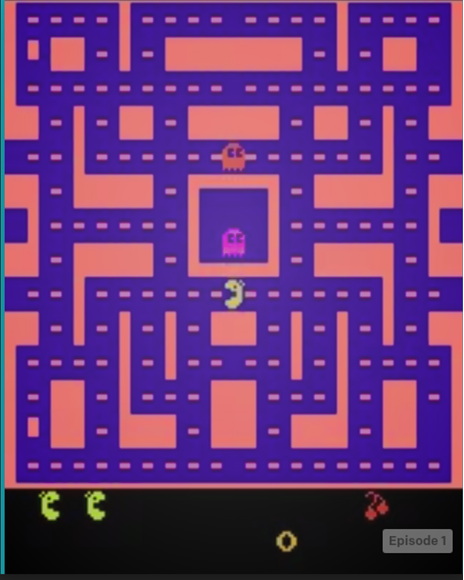

<center>Figura 1 - Ms. Pacman.</center>

##  Ambiente

Usamos [OpenAI’s Gym](https://gym.openai.com/), que é um toolkit para desenvolvimento e comparação de vários algoritmos de aprendizagem por reforço. O Gym oferece-nos vários ambientes, desde problemas fundamentais de física à diferentes jogos de arcade. 

Apesar de manter o mesmo jogo do trabalho 1, neste trabalho utilizamos o ambiente de jogos Atari disponibilizado pela Gym. E o ambiente específico que usamos é o [MsPacman-v0](https://gym.openai.com/envs/MsPacman-v0/). A decisão de alterar o ambiente foi dada devido à possibilidade de utilizar implementações já existentes de algoritmos on-policy e off-policy para esse ambiente.



## Problema

**Natureza do ambiente (episódico/não episódico, determinístico/estocástico)**: O ambiente é episódico e estocástico, pois sempre existe um estado terminal em cada jogo e uma ação desejada pode levar o pacman para estados de jogo diferentes pelo fato do fantasma ser um elemento estocástico no ambiente. 

**Estados terminais**: O estado terminal é alcançado quando o jogo acaba. O jogo pode acabar quando o Pacman (utilizando sua última vida) e um dos fantasmas (sem estar sob efeito do consumo de um Super Pac-Dot) estão na mesma posição, ou seja, o fantasma devorou o pacman. Neste caso o pacman chega à um estado terminal em que ele perde o jogo. O jogo também pode acabar quando o pacman come todas as comidas do grid sem ser alcançado pelo fantasma. Neste caso o pacman chega à um estado terminal vencendo o jogo.

**Funções de reward**: As funções de reward estão relacionadas ao score do jogo, de forma que o score atual é o somátorio das rewards ao longo do tempo. Os valores de reward são fixados e determinados pela OpenAI’s Gym, de acordo com as especificações da Tabela 1.  

| Task | Reward | 
| --- | --- | 
| Comer um Pac-Dot | 10 | 
| Comer um Super Pac-Dot | 40 | 
| Comer um fantasma (comestível) | 200, 400, 800 e 1600 pontos consecutivamente* |.
| Pontuação adicional pode ser obtida comendo a fruta saltando pelo labirinto |\*\*|

<center>Tabela 1 - Função de reward.</center>

\*Os valores dos pontos são redefinidos para 200 cada vez que outro Super Pac-Dot é ingerido.

\*\*Não encontramos os valores especificos. 
  

**Todos os parâmetros empregados nos métodos ($\gamma$, step size, etc.)**: Todos os parâmetros utilizados são especificados e discutidos em cada técnica encontrada no restante deste report.

### MDP

Um Markov Decision Process (ou MDP) é uma tupla ⟨S, P, A, R, Y⟩
* **S** (Conjunto finito de estados): Um estado é uma condição do jogo. Neste ambiente, o estado é uma imagem RGB da tela, que é uma matriz de forma (210, 160, 3).
* **A** (Conjunto finito de ações): NORTE, SUL, LESTE, OESTE, NORDESTE, NOROESTE, SUDESTE, SUDOESTE E PARAR. Cada ação é executada repetidamente por uma duração de *K* quadros, onde *K* é amostrado de maneira uniforme em {2, 3, 4}. O espaço de ações utilizado configura-se como discreto.
* **P** (Matriz de transição de probabilidade): Inicialmente a probabilidade de transição para cada estado do jogo é uniforme, ou seja, existe a mesma chance do agente escolher qualquer uma das 9 ações. Entretanto, no decorrer da otimização essas probabilidades são ajustadas.
* **R** (Função de reward): Usamos a função de reward fornecida pelo ambiente (descrita acima).
* **Y** (Fator de desconto): O fator de desconto é um número entre 0 e 1, os valores testados são especificados em cada técnica implementada. 

##Ms. Pacman - Arquitetura

Como a representação do estado do ambiente é uma imagem, utilizamos uma rede convolucional para realizar a extração de features seguida por duas camadas feedforward com 32 neurônios cada para estimar a Q-function. A CNN possui 2 camadas convolucionais e função de ativação Relu (Figura 2). Até esse ponto, a saída é um vetor de features de 64 dimensões, que alimenta a primeira camada feedforward de 32 neurônios. Ao final, a saída é o valor da Q-function para cada uma das 9 ações possíveis. 

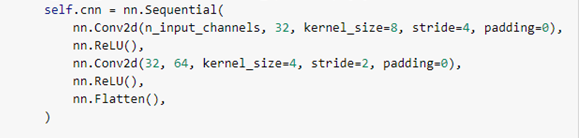

<center>Figura 2 - Arquitetura da rede extratora de features.</center>

## Experimento I - Ms. Pacman com DQN

O objetivo deste experimento é avaliar o desempenho do agente com configurações diferentes de parâmetros e analisar criticamente os resultados. Neste experimento foram testadas 7 configurações diferentes de parâmetros, cujos resultados são esboçados na Tabela 2. 

| id | lr | buffer_size | batch_size | tau | gamma ($\gamma$) | exploration_fraction | Tempo (segundos) | Média | Desvio
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | 
| 1 | 0.0005 | 10000 | 32 | 0.2 | 0.99 | 0.1 | 18680.38 | 1688.0 | 709.7 |
| 2 | 0.0005 | 10000 | 32 | 0.5 | 0.99 | 0.7 | 17176.83 | 1759.3 | 693.7 |
| 3 | 0.0005 | 10000 | 32 | 0.5 | 0.99 | 0.5 | 19301.75 | 1400.6 | 545.8 |
| 4 | 0.0005 | 10000 | 32 | 0.5 | 0.99 | 0.1 | 18451.75 | 1990.0| 966.3 |
| 5 | 0.00005 | 10000 | 32 | 0.5 | 0.2 | 0.1 | 14929.69 | 573.3 | 255.0 |
| 6 | 0.00005 | 20000 | 32 | 0.5 | 0.2 | 0.1 | 15679.66 | 374.6 | 222.0 |
| 7 | 0.00005 | 20000 | 64 | 0.5 | 0.2 | 0.1 | 16897.80 | 687.3 | 556.5|

<center>Tabela 2 - Resultados do DQN usando o Ms. Pacman. Os dados de média e desvio padrão são referentes à 30 jogos utilizados para avaliar o agente após o treinamento. Parâmetros comuns em todas as configurações: **learning_starts** = 50000, **train_freq** = 4
**gradient_steps** = 1, **n_episodes_rollout** = -1, **optimize_memory_usage**= FALSE, **exploration_initial_eps** = 1, **exploration_final_eps** = 0.05, **max_grad_norm** = 10,
**_init_setup_model** = True. </center>

Em média, para cada **id** do experimento proposto utilizamos 5 horas de processamento, levando a um total de 35 horas. Esta tabela revela um resultado relativamente inesperado: a baixa performance do algoritmo no ambiente implementado. Em todas as simulações o agente perdeu a maior parte dos jogos. Várias questões de melhoria podem ser levantadas com esse resultado. Possivelmente a rede neural que estima a Q-function está muito simples, já que são usadas apenas duas camadas feedforwad após o extrator de features. Além disso, o tamanho do buffer pode estar muito reduzido para o problema. Uma questão que também pode ser levantada é a quantidade total de **timesteps**. Para todas as simulações usamos 1000000 de timesteps. Entretanto, encontramos resultados melhores na literatura com experimentos usando valores na ordem de 40 milhões, número muito superior ao explorado neste trabalho. Além disso, o tempo de treinamento dessas soluções era bastante alto, cerca de 3 dias em algumas implementações. 

A figura 3 mostra que para todos os id's a pontuação dos 30 jogos é bem instável, sendo que o pacman perdeu todos os jogos usando todas as configurações testadas. O id 4 foi o que obteve os melhores resultados, mas ainda assim o agente não venceu nenhuma partida das 30 partidas avaliadas. Podemos ver uma leve separação entre os id's formando dois grupos: (1,2,3,4) e (5,6,7). O segundo grupo apresenta em sua configuração um gamma próximo de 0, e no primeiro, gamma é próximo de 1. Essa diferença crítica de desempenho entre os grupos está diretamente relacionada a este parâmetro. Uma vez que o gamma tem como objetivo quantificar a importância das recompensas futuras. O gamma próximo de 0 torna o agente imediatista, ou seja, ele considera apenas as respostas imediatas para tomar uma decisão, o que nem sempre é desejado, já que o agente pode desconsiderar trajetórias melhores apenas por não obter a melhor reward imediatamente.


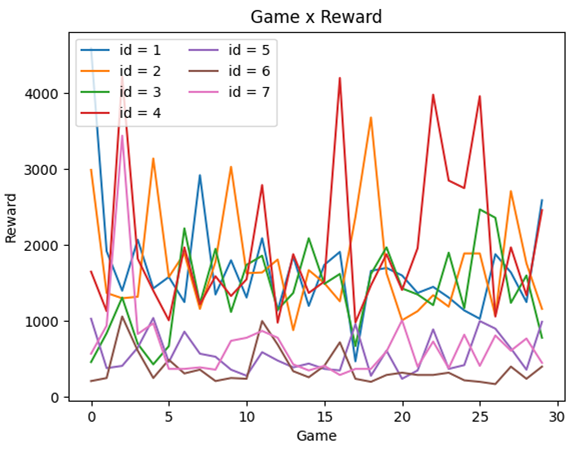

<center>Figura 3 - Gráfico de game x reward do agente DQN usando o Ms. Pacman. </center>

Para confeccionar o experimento, pensamos em alguns parâmetros como o tamanho do buffer (**buffer_size**). Com o objetivo de tornar o processo de treinamento mais estável, ou seja, evitar o aprendizado da rede sobre dados relativamente correlacionados, o que pode acontecer se realizarmos o aprendizado em atualizações consecutivas - última transição. Aplicamos um buffer de replay (usamos 2 configurações: 10000 e 20000) que memoriza experiências do comportamento do agente. Em seguida, o treinamento é realizado em amostras aleatórias do buffer de reprodução. Desta forma reduzimos a correlação entre a experiência do agente e ajudamos o agente a aprender melhor com uma ampla gama de experiências, porém não obtivemos sucesso. Acreditamos que o buffer poderia ser maior que o que estimamos para este problema. Também alteramos o tamanho do batch, que consiste em um conjunto aleatório de experiências que é recuperado da memória do agente, mas não obtivemos sucesso, valores de *tau* próximos de 0.5 para atualização suave dos parâmetros de destino também não apresentaram melhoria. Devido ao tempo de treinamento, não conseguimos explorar outros parâmetros que também podem ser relevantes para melhoria dos resultados, tais como: learning rate, parâmetros da arquitetura (quantidade de camadas, função de ativação, normalização de batch), valores de exploração final e inicial.


##Experimento II - Ms. Pacman com PPO 

No experimento II testamos 12 configurações diferentes de parâmetros, que são esboçados na tabela 3. Os parâmetros **batch_size**, **epochs**, e **total_timesteps** atuam diretamente no controle das experiências usando a política atual e controlam o tempo de experiência do agente no mundo com uma determinada política, atuando diretamente na qualidade das transições recuperadas. Por outro lado, o coeficiente de entropia (**ent_coenf**) atua como um regularizador das duas funções de perda auxiliares da função objetivo.

|  id | batch_size | epochs |  ent_coef | lr | total_timesteps | Tempo (segundos) | Média | Desvio
| --- | --- | --- | --- | --- | --- | --- | --- | --- | 
| 1 | 4 | 20 | 0.01 | 0.003 | 2000 | 42.38 | 310.0 | 0.0 |
| 2 | 4 | 20 | 0.01 | 0.003 | 200000 | 4058.97 | 244.3 | 30.5 |
| 3 | 4 | 20 | 0.01 | 0.00005 | 2000 | 121.47 | 492.0 | 334.3 |
| 4 | 4 | 20 | 0.01 | 0.00005 | 200000 | 7887.28 | 469.6 | 283.3 |
| 5 | 64 | 20 | 0.01 | 0.003 | 2000 | 37.03 | 60.0 | 0.0 | 
| 6 | 64 | 20 | 0.01 | 0.003 | 200000 | 3477.92 | 390.0 | 0.0 |
| 7 | 64 | 20 | 0.01 | 0.00005 | 2000 | 56.34 | 70.0 | 0.0 |
| 8 | 64 | 20 | 0.01 | 0.00005 | 200000 | 4162.29 | 165.0 | 12.8 | 
| 9 | 64 | 5 | 0.01 | 0.003 | 1000000 | 14407.51 | 264.6 | 31.1 |
| 10 | 64 | 5 | 0.01 | 0.00005 | 1000000 | 16141.75 | 210.0 | 0.0 |
| 11 | 4 | 5 | 0.01 | 0.00005 | 1000000 | 23019.05| 313.6 | 35.8 |
| 12 | 4 | 20 | 0.1 | 0.0003 | 200000 | 3405.60 | 219.0 | 3.0 |

<center>Tabela 3 - Resultados do PPO usando o Ms. Pacman. Os dados de média e desvio padrão são referentes à 30 jogos utilizados para avaliar o agente após o treinamento. Parâmetros comuns em todas as configurações: **clip_range** = 0.2, **lam** = 0.95 **gamma** = 0.99, **target_kl** = 0.01, **clip_range_vfe**= None, **max_grad_norm** = 0.5, **vf_coef** = 0.5, **learning_rate** = 0.00025 , **n_steps** = 128, **noptepochs** = none <center>




De modo geral, o tempo de processamento dos experimentos utilizando o PPO tem uma oscilação maior em relação ao tempo de processamento do DQN, isso pode estar relacionado a alteração no valor de timesteps, levando à um total de 22 horas de processamento. Novamente o resultado foi um algoritmo de baixa performance. Em todas as simulações o agente perdeu, como mostra a figura 4, a maior parte das rewards está abaixo de 1000. Vale ressaltar que o desempenho do agente PPO foi inferior ao pacman utilizando o DQN. Com o DQN ainda foi obtida uma configuração de parâmetros em que o agente consegue uma média de reward igual à 1990. Por outro lado, utilizando o PPO nenhum dos testes ultrapassou uma média de 500.00. Acreditamos que os resultados ruins se devem à uma quantidade baixa de timesteps para o problema em questão, assim como as arquiteturas do actor e do critic podem estar muito simples. Além disso, outro possível problema é que não foram exploradas variações de parâmetros relacionados ao controle na qualidade de atualização da nova política a partir da política anterior (parâmetros como **clip_range, lambda, gamma, e target_kl**). Se a política for atualizada em um step muito grande a performance dela pode cair drasticamente e nunca se recuperar.


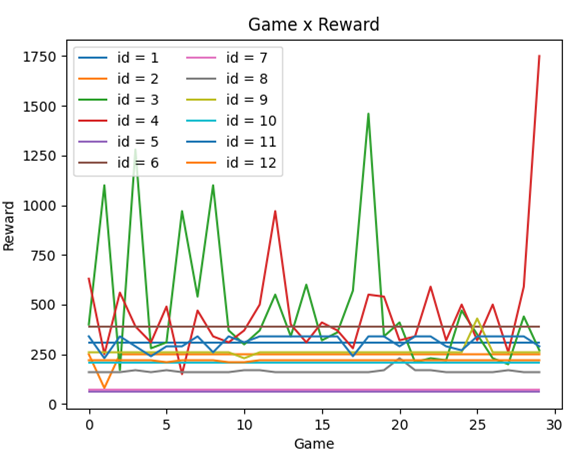

<center>Figura 4 - Gráfico de game x reward do agente PPO usando o Ms. Pacman.<center>

## Ms. Pacman - Conclusões

Ambos os algoritmos implementados (DQN e PPO), não tiveram desempenho satisfatório durante o treinamento. Em ambas as técnicas, uma alternativa para ser avaliada futuramente é aumentar o número de timesteps, realizar diversos testes com arquiteturas mais complexas, adicionar recompensas auxiliares. Especificamente para o PPO, é interessante investigar também diferentes configurações dos parâmetros relacionados à atualização da política. Especificamente para o DQN, é interessante adicionar descida de gradiente assíncrona para otimização da rede neural profunda. Entretanto, o grupo optou por não continuar a investigação das técnicas usando o ambiente Ms. Pacman pelos seguintes motivos:



1.   O tempo de treinamento dos algoritmos nesse ambiente é elevado para os recursos computacionais disponíveis pelo grupo;
2.   Dada a elevada quantidade de timesteps encontrada na literatura para conseguir realizar um bom treinamento e dado o tempo para realização do trabalho seria extremamente complicado conseguir encontrar bons modelos em tempo hábil para a entrega, já que milhões de timesteps neste ambiente resultam em dias de treinamento à depender dos recursos de hardware disponíveis;
3.   Dados todos os items acima, seria extremamente complicado conseguir realizar vários testes com variações de parâmetros e isso poderia prejudicar o aprofundamento nas técnicas e a análise crítica com relação ao papel dos parâmetros em cada algoritmo.

Desta forma, optamos por continuar a investigação em um ambiente mais simples, o cartpole, também disponibilizado pela openAi's gym. Os resultados obtidos com o cartpole são descritos nas seções seguintes deste trabalho.


#CartPole

No problema do Cartpole, temos um carrinho que pode ir para a esquerda e direita em um caminho linear, sem atrito. Montado no carrinho está um pêndulo, que começa na posição vertical. O objetivo é manter o pêndulo em pé e, caso ele se incline para um lado ou para o outro, o carrinho deve se mover de tal forma que contraria a inclinação do pêndulo. A figura 5 ilustra o ambiente utilizado.

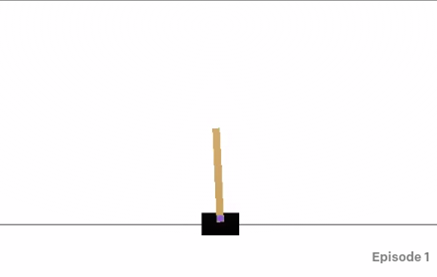

<center>Figura 5 - Cartpole.<center>

##Ambiente

Utilizamos o ambiente de controle clássico disponibilizado pela Gym. E o ambiente específico que usamos é o [CartPole-v1](https://gym.openai.com/envs/CartPole-v1/).



##Problema

**Natureza do ambiente (episódico/não episódico, determinístico/estocástico)**: O carrinho sempre atinge um estado terminal, não existe atrito e a aceleração da gravidade é sempre constante. Portanto, podemos considerar a natureza do ambiente determinística e episódica.

**Estados terminais**: Ângulo do pendulo superior à 15 graus; deslocamento do carrinho superior à 2.4 unidades do centro (o centro do carrinho atinge a borda do display) ou atingir número máximo de timesteps.

**Funções de reward**:  +1 para cada timestep em que o pêndulo permanece em pé.

**Todos os parâmetros empregados nos métodos ($\gamma$, step size, etc.)**: Todos os parâmetros utilizados são especificados e discutidos em cada técnica encontrada no restante deste report.

##MDP

Um Markov Decision Process (ou MDP) é uma tupla ⟨S, P, A, R, Y⟩
* **S** (Conjunto finito de estados): O estado é composto pelos valores dos seguintes parametros:

| Num | Observação | Min | Max| 
| --- | --- | --- | ---|
| 0 | Posição do carrinho | -4.8 | 4.8|
| 1 | Velocidade do carrinho | -Inf | Inf |
| 2 | Ângulo do pêndulo | -0.418 rad (-24 deg) | 0.418 rad (24 deg)|
| 3 | Velocidade angular do Pêndulo | -Inf | Inf|

<center>Tabela 4 - Parâmetros que compõem o estado no Cartpole.</center>

O espaço de estados utilizado configura-se como contínuo.

* **A** (Conjunto finito de ações): LESTE, OESTE. O espaço de ações utilizado configura-se como discreto.
* **P** (Matriz de transição de probabilidade): Inicialmente a probabilidade de transição para cada estado da simulação é uniforme, ou seja, existe a mesma chance do agente escolher qualquer uma das 2 ações. Entretanto, no decorrer da otimização essas probabilidades são ajustadas.
* **R** (Função de reward): +1 para cada timestep em que o pêndulo permanece em pé.
* **Y** (Fator de desconto): O fator de desconto é um número entre 0 e 1, os valores testados são especificados em cada técnica implementada.  

## CartPole - Arquiteturas DQN

Utilizamos quatro tipos de arquitetura para definir a rede que estima o Q function:

1.  **lnMlpPolicy:** Duas camadas feedfoward de 64 neurônios cada, com normalização após a saída de cada camada.
2.  **simpleMLP:** Duas camadas feedfoward de 32 neurônios cada sem normalização.
3.  **mediumMLP:** Duas camadas feedforward, a primeira com 128 neurônios e a segunda com 64, ambas as camadas não possuem normalização. 
4.  **MlpPolicy:** Duas camadas feedfoward de 64 neurônios cada, sem normalização.



## Experimento I - Cartpole com DQN

Neste experimento utilizamos quatro tipos de arquiteturas diferentes para estimar o Q function, realizamos uma exploração inicial utilizando sempre que possível os mesmos parâmetros utilizados nos testes com o Pacman para comparar os desempenhos conseguidos com a mudança do ambiente, como pode ser observado na tabela 5. Em seguida, realizamos também diversas explorações adicionais.

| id | lr | buffer_size | batch_size | gamma ($\gamma$) | exploration_fraction | Tempo (segundos) | Taxa de acerto (%) | Média | Desvio
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |  
| 1 | 0.0005 | 10000 | 32 | 0.99 | 0.1 | 14836.51 | 100%| 500.0 | 0.0 |
| 2 | 0.0005 | 10000 | 32 | 0.99 | 0.7 | 8353.22 | 100%| 500.0 | 0.0 |
| 3 | 0.0005 | 10000 | 32 | 0.99 | 0.5 | 10979.57 | 0% | 195.9 | 11.1 |
| 4 | 0.00005 | 10000 | 32 | 0.2 | 0.1 | 3002.20 | 0%| 9.5 | 1.3 |
| 5 | 0.00005 | 20000 | 32 | 0.2 | 0.1 | 2961.93 | 0%|  69.4 | 41.6|
| 6 | 0.00005 | 20000 | 64 | 0.2 | 0.1 | 3233.82 | 0%| 10.2 | 0.94|

<center>Tabela 5 - Resultados do DQN usando o Cartpole. Os dados de média e desvio padrão são referentes à 100 jogos utilizados para avaliar o agente após o treinamento. Parâmetros comuns em todas as configurações: **learning_starts** = 50000, **train_freq** = 4
**gradient_steps** = 1, **n_episodes_rollout** = -1, **optimize_memory_usage**= False, **exploration_initial_eps** = 1, **exploration_final_eps** = 0.05, **max_grad_norm** = 10,
**_init_setup_model** = True. </center>

O processamento dos experimentos utilizando o DQN levou um total de 12 horas. Para as configurações da tabela 5 há duas (1, 2) com 100% de taxa de acerto (Figura 6), o que não foi observado no primeiro teste com o ambiente Ms. Pacman. Dentre as duas melhores configurações, o id 2 obteve o melhor desempenho com uma fração de exploração mais alta e menor tempo de processamento. A probabilidade de realizar uma ação aleatória (ou seja, uma ação exploratória) é um número que geralmente começa alto e diminui com o tempo. Isso faz sentido porque no início da fase de aprendizagem a política aprendida ainda é inútil, mas melhora à medida que o aprendizado avança. Como a melhor configuração obtida utiliza uma fração de exploração alta, isso significa que comparado às outras configurações o agente passa mais tempo explorando o ambiente e a taxa de exploração cai mais lentamente. Como existe um *trade-off* típico entre exploração e exploitação acredita-se que o valor desse parâmetro foi essencial para garantir esse equilíbrio, um treinamento mais rápido e com bons resultados.

Outro ponto importante a ser levantado é que utilizando o cartPole e uma arquitetura simples (lnMLPPolicy) foi possível obter resultados melhores utilizando os mesmos parâmetros utilizados no Pacman. Essa é uma possível evidência de que um dos maiores gargalos do aprendizado no Pacman era a arquitetura muito simples, já que o estado do cartPole é apenas um vetor de 4 posições, enquanto que no Pacman o estado é uma imagem. 

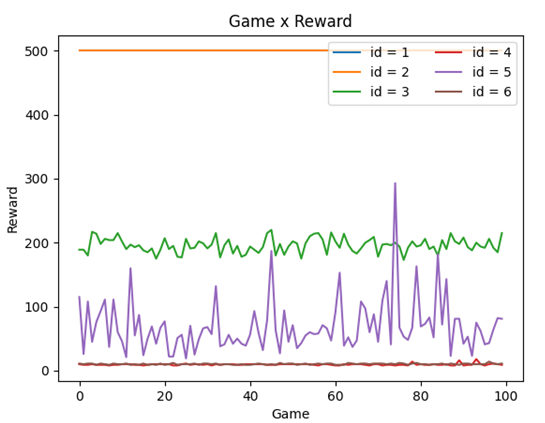

<center>Figura 6 - Gráfico de game x reward do agente DQN usando o CartPole.</</</center>

Na segunda etapa, exploramos ainda mais os parâmetros utilizando a política **lnMLPPolicy**, cujos resultados estão na tabela 6. Nesta rodada de experimentos conseguimos algumas configurações com resultados promissores, como os id's 1, 4, 5, 8, 10, 11, 14, 15, e 17. Entretanto, apenas nos id's 4 e 11 foram obtidas rewards máximas em todas as simulações testadas. De modo que a melhor solução é a configuração 4 (tempo - 26.62 s e 100% de acerto), pois o tempo de execução e o percentual de timesteps total usado para convergência é ligeiramente menor que na solução 11 (tempo = 40.82 s e 100% de acerto). Observa-se também que alguns parâmetros foram determinantes para a qualidade da solução. O valor de gamma baixo (0.2), a troca da política por políticas mais simples (MlpPolicy e simpleMLP), o learning rate abaixo de 5e-6, taxa de exploração alta (0.6), uso do prioritized replay com valores de alpha e beta altos (1.0), e o update do modelo numa frequência acima de 10 timesteps prejudicaram drasticamente o desempenho do agente. Os valores de gamma baixos tornam o agente imediatista, frequentemente os valores de gamma mais indicados na literatura estão entre 0.9 e 1.0. Possivelmente com um learning rate muito baixo seriam necessários mais timesteps para o modelo convergir. Além disso, é possível que com o prioritized replay existam possibilidades do modelo convergir para ótimos resultados, mas os valores de alpha e gamma precisam ser ajustados para valores mais baixos. 


Os parâmetros que menos prejudicaram o desempenho do agente foram a troca da política lnMlpPolicy pela mediumPolicy, o uso do prioritized replay com os coeficientes de alfa e beta menores que 1.0, o uso de um buffer de apenas 5000 elementos, valor final de exploração alto (0.5), valores baixos de exploração inicial (0.1), mudanças no tamanho do batch e aumento do total de timesteps. Acredita-se que esses parâmetros afetaram pouco o desempenho do agente por conta da simplicidade do ambiente utilizado. A troca das políticas também apresentou resultados interessantes, com políticas muito simples o agente não se saiu bem nos testes mesmo usando os mesmos parâmetros da configuração 4, apenas utilizando a política mediumMLP e lnMlpPolicy foram obtidos bons resultados, demonstrando que a política tem um papel crucial no processo de generalização do aprendizado. Entretanto, o uso de outras políticas talvez esboce bons resultados, mas com um novo ajuste de parâmetros, o que foi feito na terceira etapa de testes.     

|  id | Arquitetura | prioritized replay |  gamma | learning_rate | buffer_size | exploration_fraction| exploration_final_eps |exploration_initial_eps |target_network_update_freq| prioritized_replay_alpha |prioritized_replay_beta0|prioritized_replay_beta_iters| prioritized_replay_eps | learning_starts|batch_size|train_freq|total_timesteps|% de time steps|tempo (s)|Taxa de acerto (%)|Média|Desvio|
| --- | --- | --- | --- | --- | --- | --- | --- | --- |--- | --- |--- | --- | --- | --- | --- | --- | --- | --- | --- |--- | --- |--- |
| 01| mediumMLP | False | 0.99 | 0.0005 | 100000 |0.1|0.02|1|500 |0.6|0.4|None | 0.000001| 1000 |32 |1 | 10000 | 32% |11.36|87% |441.0|152.6
| 02| simpleMLP| False | 0.99 | 0.0005 | 100000 |0.1|0.02|1|500 |0.6|0.4|None | 0.000001| 1000 |32 |1 | 10000 | 100% |55.54|4% |199.0|52.0
| 03| MlpPolicy| False | 0.99 | 0.0005 | 100000 |0.1|0.02|1|500 |0.6|0.4|None | 0.000001| 1000 |32 |1 | 10000 | 100% |58.05|0% |159.4|32.3
| 04| LnMlpPolicy| False | 0.99 | 0.0005 | 100000 |0.1|0.02|1|500 |0.6|0.4|None | 0.000001| 1000 |32 |1 | 10000 | 41% |26.62|100% |500.0|0.0
| 05| LnMlpPolicy| True | 0.99 | 0.0005 | 100000 |0.1|0.02|1|500 |0.6|0.4|None | 0.000001| 1000 |32 |1 | 10000 | 47% |49.30|98% |494.3|25.5
| 06| LnMlpPolicy| False | 0.2 | 0.0005 | 100000 |0.1|0.02|1|500 |0.6|0.4|None | 0.000001| 1000 |32 |1 | 10000 | 100% |50.59|0% |12.0|5.7
| 07| LnMlpPolicy| False | 0.99 | 0.000005 | 100000 |0.1|0.02|1|500 |0.6|0.4|None | 0.000001| 1000 |32 |1 | 10000 | 100% |45.2|0% |9.3|0.7
| 08| LnMlpPolicy| False | 0.99 | 0.0005 | 5000 |0.1|0.02|1|500 |0.6|0.4|None | 0.000001| 1000 |32 |1 | 10000 | 32% |18.31|89% |458.8|117.2
| 09| LnMlpPolicy| False | 0.99 | 0.0005 | 100000 |0.6|0.02|1|500 |0.6|0.4|None | 0.000001| 1000 |32 |1 | 10000 | 100% |90.99|17% |240.6|107.3
| 10| LnMlpPolicy| False | 0.99 | 0.0005 | 100000 |0.1|0.5|1|500 |0.6|0.4|None | 0.000001| 1000 |32 |1 | 10000 | 33% |22.84|97% |489.5|57.1
| 11| LnMlpPolicy| False | 0.99 | 0.0005 | 100000 |0.1|0.02|0.1|500 |0.6|0.4|None | 0.000001| 1000 |32 |1 | 10000 | 49% |40.82|100% |500.0|0.0
| 12| LnMlpPolicy| False | 0.99 | 0.0005 | 100000 |0.1|0.02|1|2000 |0.6|0.4|None | 0.000001| 1000 |32 |1 | 10000 | 100% |67.76|0% |74.3|34.1
| 13| LnMlpPolicy| True| 0.99 | 0.0005 | 100000 |0.1|0.02|1|500 |1|1|10 | 0.0001| 1000 |32 |1 | 10000 | 100% |70.44|0% |261.2|18.9
| 14| LnMlpPolicy| False| 0.99 | 0.0005 | 100000 |0.1|0.02|1|500 |0.6|0.4|None | 0.000001| 2000|32 |1 | 10000 | 42% |20.10|90% |468.6|81.4
| 15| LnMlpPolicy| False| 0.99 | 0.0005 | 100000 |0.1|0.02|1|500 |0.6|0.4|None | 0.000001| 1000|64 |1 | 10000 | 33% |19.90|96% |488.4|58.2
| 16| LnMlpPolicy| False| 0.99 | 0.0005 | 100000 |0.1|0.02|1|500 |0.6|0.4|None | 0.000001| 1000|32 |10 | 10000 | 100% |33.56|1% |82.0|70.1
| 17| LnMlpPolicy| False| 0.99 | 0.0005 | 100000 |0.1|0.02|1|500 |0.6|0.4|None | 0.000001| 1000|32 |1 | 1000000 | 4.47% |376.18|98% |494.9|28.8

<center>Tabela 6 - Resultados do DQN usando o CartPole. Os dados de média e desvio padrão são referentes à 100 jogos utilizados para avaliar o agente após o treinamento.</center>




Na terceira etapa de testes procuramos explorar se com uma política extremamente simples (simpleMLP) é possível conseguir bons resultados. Além disso, verificamos se é possível melhorar os resultados usando a política mediumMLP, pois apesar de ser mais complexa ela não utiliza a normalização entre camadas, e o nosso objetivo é avaliar se a normalização teve um peso essencial no desempenho do agente. A tabela 7 e a figura 7 mostram todos os resultados obtidos utilizando as configurações de experimentos que foram realizadas utilizando as duas políticas em questão. Diante dos resultados apresentados, encontramos algumas configurações de parâmetros onde o agente tem uma taxa de 100% de acerto. As variações de parâmetros ficaram em torno da quantidade de timesteps, do tamanho do buffer, do prioritized replay, e dos valores de gamma. Aparentemente o sucesso do agente com as políticas alternativas está ligado ao aumento da quantidade de timesteps necessária para o sistema convergir, pois todos os agentes utilizaram mais que 10000 timesteps. Outro ponto importante observado, é que a normalização teve um papel essencial para o treinamento mais rápido do sistema. 


No id 5, podemos verificar que a combinação entre uma arquitetura mais simples, número de timesteps elevado, e a utilização do benefício do **experience replay** pode estar relacionado com este sucesso na configuração. Ao invés de amostragem uniforme do buffer de reprodução, foi analisado o erro que é cometido pela função de valor. Quanto maior o erro, maior probabilidade de entrar no minilote. A seleção é eficiente feito por ter uma árvore binária que tem o erro para cada índice de o buffer de memória que não desacelera muito o algoritmo. Ao armazenar as experiências de um agente e, em seguida, desenhar lotes delas aleatoriamente para treinar a rede, podemos aprender a ter um bom desempenho na tarefa de maneira mais robusta. Ao manter as experiências que extraímos aleatórias, evitamos que a rede apenas aprenda sobre o que está fazendo imediatamente no ambiente e permitimos que ela aprenda com uma gama mais variada de experiências anteriores. Cada uma dessas experiências é armazenada como uma tupla de (estado, ação, recompensa, próximo estado). O buffer do experience replay armazena um número fixo de memórias recentes e, conforme as novas entram, as antigas são removidas. Quando chega a hora de treinar, simplesmente extraímos um lote uniforme de memórias aleatórias do buffer e treinamos nossa rede com elas. 


Por fim, podemos verificar que a troca da política também influencia diretamente na troca de outros parâmetros para conseguir bons resultados. Desta forma, no id 9 são observados os melhores resultados desta rodada de experimentos, em que o agente demorou mais tempo para aprender (20000 timesteps), mas conseguiu adquirir reward máxima em todas as simulações, como pode ser observado na linha rosa do gráfico da figura 7.


|  id | Arquitetura | prioritized replay |  gamma | buffer_size | total_timesteps | % de time steps (Real)|Tempo (segundos) | Taxa de acerto (%)|Média | Desvio
| --- | --- | --- | --- | --- | --- | --- | --- | --- |--- | --- |
|01| mediumMLP| False | 0.1 | 50000 | 1000000000 | 0.01% |199.65  | 91% | 476.3|65.9 |
|02| mediumMLP| False | 0.99 | 50000 | 1000000000 | 0.003%|215.99  | 99% |490.1 | 30.6|
|03| mediumMLP| False | 0.1 | 50000 | 10000 | 99% | 31.16 | 0% | 9.3|0.7 |
|04| mediumMLP| False | 0.99 | 50000 | 10000 | 32% | 10.98 | 87% |441.0 |152.6 |
|05| mediumMLP| True | 0.99 | 100000 | 10000 | 32% |87.49  | 7% | 236.6|56.6 |
|06| mediumMLP| True | 0.1 | 100000 | 1000000000 | 0.0003% | 461.45 | 100% |500.0 | 0.0|
|07| mediumMLP| True | 0.99 | 5000 | 10000 | 100% | 11.87 | 0% | 215.4|42.0 |
|08| simpleMLP| False | 0.1 | 50000 | 1000000000 | 0.02% |  686.16| 100% |500.0 |0.0 |
|09| simpleMLP| False | 0.99 | 50000 | 1000000000 | 0.01% | 291.61 | 100% |500.0 |0.0 |
|10| simpleMLP| False | 0.1 | 50000 | 10000 | 100% |28.85  | 0% |95.0 |70.5 |
|11| simpleMLP| False | 0.99 | 50000 | 10000 | 100% |54.40  | 4% |199.0 | 52.0|
|12| simpleMLP| True | 0.99 | 100000 | 10000 | 100% |63.02  | 0% |119.3 | 18.4|
|13| simpleMLP| True | 0.99 | 5000 | 10000 | 100% | 43.83 | 0% | 9.3|0.6 |

<center>Tabela 7 - Resultados do DQN usando o CartPole. Os dados de média e desvio padrão são referentes à 100 jogos utilizados para avaliar o agente após o treinamento. Parâmetros comuns em todas as configurações: **learning_rate** = 0.0005, **exploration_fraction** = 0.1 **exploration_final_eps** = 0.02, **exploration_initial_eps** = 1.0, **target_network_update_freq**= 500, **prioritized_replay_alpha** = 0.6, **prioritized_replay_beta0** = 0.4, **prioritized_replay_beta_iters** = None, **prioritized_replay_eps** = 0.000001,**param_noise** = False, **learning_starts** = 1000, **batch_size** = 32, **train_freq** = 1, **double_q** = False  <center>


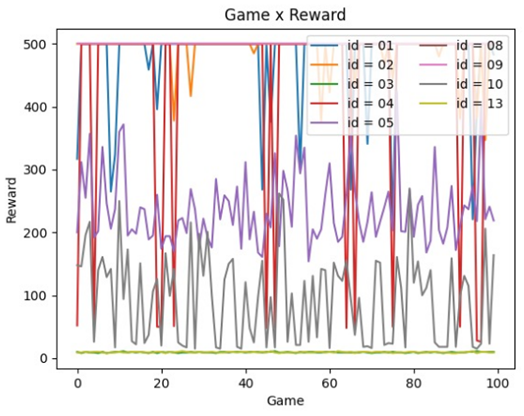

<center>Figura 7 - Gráfico de game x reward do agente DQN usando o CartPole.</center>

## CartPole - Arquitetura PPO

Utilizamos três tipos de arquitetura para definir o actor e o critic:

1.  **net_simple:** Três camadas feedfoward de 32 neurônios cada, sem normalização após a saída de cada camada, e função de ativação tangente hiperbólica. Essa configuração é compartilhada para o actor e para o critic.
2.  **net_medium:** Três camadas feedfoward de 64 neurônios cada, sem normalização após a saída de cada camada, e função de ativação tangente hiperbólica. Essa configuração é compartilhada para o actor e para o critic.
3.  **net_complex:** Uma camadas feedforward inicial com 128 neurônios (essa camada é compartilhada entre o actor e o critic), em seguida para o actor e para o critic de forma desacoplada duas camadas feedfoward de 32 neurônios cada, e função de ativação tangente hiperbólica. 


## Experimento II - Cartpole com PPO


Neste experimento utilizamos três tipos de arquiteturas diferentes para estimar o value function e a escolha da melhor ação, realizamos uma exploração inicial utilizando principalmente a configuração mais complexa da rede neural, como pode ser observado na tabela 8. Em seguida, realizamos também diversas explorações adicionais.

|  id | Arquitetura | max_grad_norm |  lam | cliprange| cliprange_vf | vf_coef| learning_rate|ent_coef |n_steps| gamma |noptepochs|nminibatches|total_timesteps|% de time steps|tempo (s)|Taxa de acerto (%)|Média|Desvio
| --- | --- | --- | --- | --- | --- | --- | --- | --- |--- | --- |--- | --- | --- | --- | --- | --- | --- | --- |
| 01| net_simple |0.5| 0.95|0.2 |None|0.5|0.00025| 0.01 |128 |0.99|30|4 | 6000| 20% | 10.80 | 100%| 498.7| 10.2 |
| 02| net_medium |0.5| 0.95|0.2 |None|0.5|0.00025| 0.01 |128 |0.99|30|4 | 6000| 96.67% | 57.32 | 0%| 281.1| 25.5 |
| 03| net_complex|0.5| 0.95|0.2 |None|0.5|0.00025| 0.01 |128 |0.99|30|4 | 6000| 40% | 23.73 | 100%| 496.6| 19.1|
| 04| net_complex|0.2| 0.95|0.2 |None|0.5|0.00025| 0.01 |128 |0.99|30|4 | 6000| 66.67% | 40.99 | 100%| 499.5| 2.6|
| 05| net_complex|0.5| 0.2|0.2 |None|0.5|0.00025| 0.01 |128 |0.99|30|4 | 6000| 96.67% | 42.46 | 0%| 135.2| 13.7|
| 06| net_complex|0.5| 0.95|0.3 |None|0.5|0.00025| 0.01 |128 |0.99|30|4 | 6000| 50% | 28.95 | 100%| 499.0| 9.3|
| 07| net_complex|0.5| 0.95|0.2 |0.3|0.5|0.00025| 0.01 |128 |0.99|30|4 | 6000| 55% | 35.48 | 72%| 423.5| 82.8|
| 08| net_complex|0.5| 0.95|0.2 |None|0.8|0.00025| 0.01 |128 |0.99|30|4 | 6000| 68.33% | 55.42 | 100%| 500.0| 0.0|
| 09| net_complex|0.5| 0.95|0.2 |None|0.5|0.001| 0.01 |128 |0.99|30|4 | 6000| 23.33% | 12.86 | 100%| 487.8| 29.1|
| 10| net_complex|0.5| 0.95|0.2 |None|0.5|0.00025| 0.0001 |128 |0.99|30|4 | 6000| 66.67%% | 42.97 | 100%| 500.0| 0.0|
| 11| net_complex|0.5| 0.95|0.2 |None|0.5|0.00025| 0.01|64 |0.99|30|4 | 6000| 40%|32.48 | 100%| 500.0| 0.0|
| 12| net_complex|0.5| 0.95|0.2 |None|0.5|0.00025| 0.01|128 |0.2|30|4 | 6000| 96.67%|19.35 | 0%| 15.6| 2.1|
| 13| net_complex|0.5| 0.95|0.2 |None|0.5|0.00025| 0.01|128 |0.99|10|4 | 6000| 33.33%|21.79| 100%| 488.7| 22.8|
| 14| net_complex|0.5| 0.95|0.2 |None|0.5|0.00025| 0.01|128 |0.99|30|128| 6000| 96.67%|332.52| 0%| 38.0| 35.3|



<center>Tabela 8 - Resultados do PPO usando o CartPole. Os dados de média e desvio padrão são referentes à 100 jogos utilizados para avaliar o agente após o treinamento. </center>

Na primeira etapa de experimentos, exploramos bastante os parâmetros utilizando a política **net_complex, net_simple, e net_medium**, cujos resultados estão na tabela 8. Nesta rodada de experimentos conseguimos a maioria das configurações com resultados promissores, exceto nos id's 2, 5, 12, e 14. Entretanto, apenas nos id's 8, 10, e 11 foram obtidas rewards máximas em todas as simulações testadas. De modo que a melhor solução é a configuração 11 (tempo - 32.48 s e 100% de acerto), pois o tempo de execução e o percentual de timesteps total usado para convergência é ligeiramente menor que nas outras configurações. Observa-se também que alguns parâmetros foram determinantes para a qualidade da solução. O valor de lambda baixo (0.2), a troca da política para net_medium, o valor de gamma baixo (0.2) e o valor dos minibatches alto (128)  prejudicaram drasticamente o desempenho do agente. Os valores de gamma baixos tornam o agente imediatista, frequentemente os valores de gamma mais indicados na literatura estão entre 0.9 e 1.0. Possivelmente um lambda muito baixo afeta drasticamente a qualidade de atualização da nova política a partir da política anterior. 

A troca das políticas também apresentou resultados interessantes, o agente se saiu muito bem com uma política bastante simples, a net_simple, e não se saiu bem com a política net_medium. Acreditamos que esse resultado se deve apenas a necessidade de configuração de parâmetros, o que foi feito na segunda etapa de testes. Para isso, pensamos em testes utilizando apenas a net_simple e a net_medium, cujos resultados estão na tabela 9.     


|  id | Arquitetura |  lam | ent_coef | gamma |nminibatches|% de time steps|tempo (s)|Taxa de acerto (%)|Média|Desvio
| --- | --- | --- | --- |  --- | --- | --- | --- | --- | --- | --- | 
| 01| net_medium | 0.2| 0.01 |0.99|4 | 96.67% | 26.56 | 0%| 56.1| 6.3|
| 02| net_simple| 0.2| 0.01 |0.99|4 | 96.67% | 26.06 | 0%| 66.9| 19.1|
| 03| net_medium| 0.95| 0.01 |0.1|4 | 96.67% | 21.16 | 0%| 21.3| 6.8|
| 04| net_simple| 0.95|0.01 |0.5|4 | 96.67% | 41.50 | 0%| 193.9| 10.46|
| 05| net_medium|0.95|0.01 |0.99|128 | 96.67% | 323.46 | 0%| 9.3| 0.7|
| 06|net_simple| 0.95|0.01 |0.99|128 | 96.67% | 391.84| 0%| 0.3| 0.8|
| 07|net_medium| 0.95| 0.0001 |0.99|4 |81.67% | 59.36| 100%| 499.8|1.4|
| 08|net_simple|0.95| 0.1 |0.99|4 | 96.67% | 50.95| 3%| 295.2|26.1|

<center>Tabela 9 - Resultados do PPO usando o CartPole. Os dados de média e desvio padrão são referentes à 100 jogos utilizados para avaliar o agente após o treinamento. Parâmetros comuns em todas as configurações: **max_grad_norm** = 0.5, **cliprange** = 0.2 , **cliprange_vf** = None, **vf_coef**= 0.5, **learning_rate** = 0.00025, **n_steps** = 128, **noptepochs** = 30, **total_timesteps** = 6000<center>


Após variar os parâmetros, lambda, gamma, minibatches, e coeficiente de entropia conseguimos encontrar um ótimo ajuste utilizando a arquitetura net_medium. Aparentemente a redução drástica do coeficiente de entropia constribuiu bastante para a estabilidade no treinamento, já que esse coeficiente está diretamente ligado ao equilíbrio entre as diferentes funções de custo presentes na função objetivo, entre outras palavras o coeficiente de entropia atua como uma espécie regularizador. Com a ajuste correto desse regularizador utilizando a arquitetura net_medium o sistema convergiu perfeitamente e o agente obteve um ótimo desempenho no mundo (média - 499.9 e desvio padrão - 1.4). Observa-se também que os valores de lambda e gamma também são cruciais para estabelecer o equílibro entre as diferentes funções de custo, valores de gamma muito baixos de modo geral não apresentam bom funcionamento, assim como valores de lambda. Por outro lado, modificar os parâmetros utilizando a net_simple só trouxe um desempenho pior para o agente nos testes realizados, como pode ser observado nos id's pares do gráfico da figura 8.  

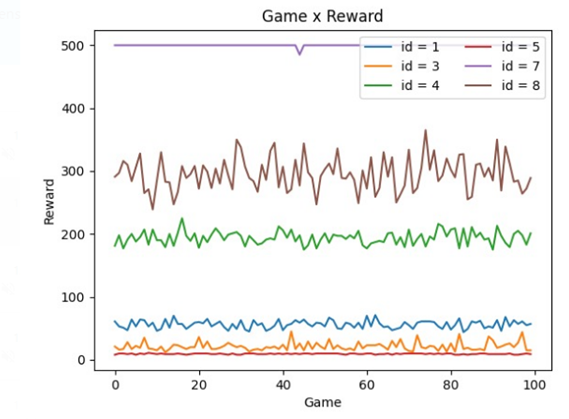

<center>Figura 8 - Gráfico de game x reward do agente PPO usando o CartPole.</center>

# Conclusões Finais

Neste trabalho foi apresentada uma gama de experimentos utilizando as técnicas DQN e PPO. Foram utilizados dois ambientes disponibilizados pela openAI, o Ms. Pacman e o cartPole. Foram feitas várias explorações em quatro conjuntos de experimentos. Observamos que a complexidade do ambiente afeta diretamente no trabalho de treinamento e definição de todos os parâmetros do sistema. À medida que o espaço de ações e de estados cresce a complexidade do treinamento aumenta exponencialmente. Um pouco dessa experiência foi adquirida comparando as dificuldades encontradas para treinar e obter bons resultados no ambiente Ms. Pacman com relação ao ambiente cartPole. 

Foi realizada uma busca de parâmetros satisfatória no trabalho, e muitas observações importantes foram levantadas. Entretanto, mais pesquisas poderiam ser feitas para fazer afirmações mais fortes sobre o desempenho dos diferentes algoritmos, além dos 80 experimentos realizados durante este projeto. Além disso, devido à limitações de tempo e restrições de custo computacional, não conseguimos explorar tanto quanto gostaríamos dos treinamentos no ambiente Ms. Pacman. Apesar dos nossos recursos limitados, conseguimos aprender bastante sobre como os algoritmos se comportam e os efeitos dos principais parâmetros. Além disso, conseguimos estabelecer uma metodologia de experimentos bastante satisfatória.

De modo geral, observamos que o DQN apresentou mais eficiência usando o Ms. Pacman, mas no ambiente cartPole o PPO apresentou muito mais estabilidade à variação de parâmetros e quantidade de timesteps menor. Normalmente o DQN apresenta comprometimento de eficiência e robustez quando comparado ao PPO. Justamente porque o PPO adiciona uma restricão flexível que pode ser otimizada por um otimizador de primeira ordem. Isso significa que o algoritmo pode tomar decisões erradas de vez em quando, mas isso atinge um bom equilíbrio sem prejudicar totalmente a otimização. Com base nesses argumentos acreditamos que a falta de estabilidade do PPO usando o Pacman seria um problema principalmente na arquitetura utilizada e nos valores de regularização.

Fazendo uma comparação com o trabalho I, observamos que o uso de aproximadores de função facilita bastante o treinamento, sem bons aproximadores seria impossível obter generalização e as técnicas de RL dificilmente teriam expansão. Com o agente tabular seria impossível pensar em possibilidades de treinamento utilizando o ambiente Ms. Pacman, justamente porque no trabalho anterior o grupo iniciou o projeto com este ambiente e precisou realizar uma troca para um ambiente também do Pacman em que é possível realizar customizações, com isso o grid dos ambientes no trabalho I foi bastante reduzido com relação ao grid clássico disponível pelo ambiente openAI. 


Os experimentos realizados no ambiente Pacman, não obtiveram sucesso, em nenhuma das configurações de parametros propostas, desta forma para melhor analizar as oportunidade existentes de melhoria sobre este ambiente seria necessario dispender um tempo maior de estudo. Em ambos os algoritmos DQN e PPO. Por outro lado, usando o cartPole conseguimos explorar suficientemente todos os parâmetros e observar que o PPO apresenta uma estabilidade muito maior à troca de parâmetros que o DQN.

Infelizmente, utilizando esses ambientes disponíveis pela openAI não é possível realizar uma troca de rewards para melhor avaliar a influência da reward no desempenho dos agentes, como foi feito no Trabalho I.




### Contribuições

Como haviam apenas duas técnicas para implementar, as tarefas foram divididas sempre de forma igual de acordo com a demanda de cada dia. De modo que todas as integrantes chegaram a trabalhar em um tipo de tarefa diferente no decorrer dos dias. As integrantes se revezaram entre código, relatório e vídeo de forma semelhante. Também todas as integrantes participaram de forma igual nas discussões e em todos os tipos de tarefas necessárias que foram surgindo no decorrer dos dias.

#Vídeo
Um vídeo mostrando as soluções desenvolvidas neste trabalho esta disponível no [Youtube](https://www.youtube.com/watch?v=tpmcNyrUrUg).



#Código fonte
O código fonte implementado esta disponível no [Github](https://github.com/leticiaberto/MO436_DRL).